In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data is Sorted from A to Z
file_path = r"C:\Users\admin\Downloads\archive (5)\smartphones.csv"
df = pd.read_csv(file_path)
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


In [3]:
# Assessing data quality (checking for missing values)
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64


In [4]:
# filling missing values
df1= df.dropna()
df1.isnull().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

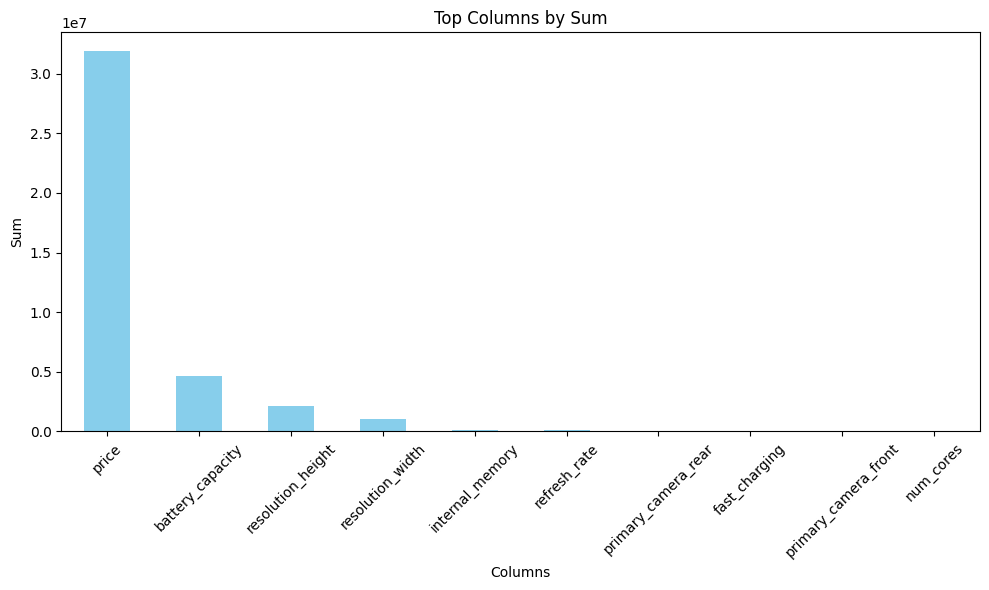

In [9]:
import matplotlib.pyplot as plt
import pandas as pd


numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Summing values across numeric columns
data_sum = df[numeric_columns].sum()

# Get the top 10 columns by sum
top_columns = data_sum.nlargest(10)  
# Create a bar chart for the top columns
plt.figure(figsize=(10, 6))
top_columns.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Top Columns by Sum')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_8304\1888683682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


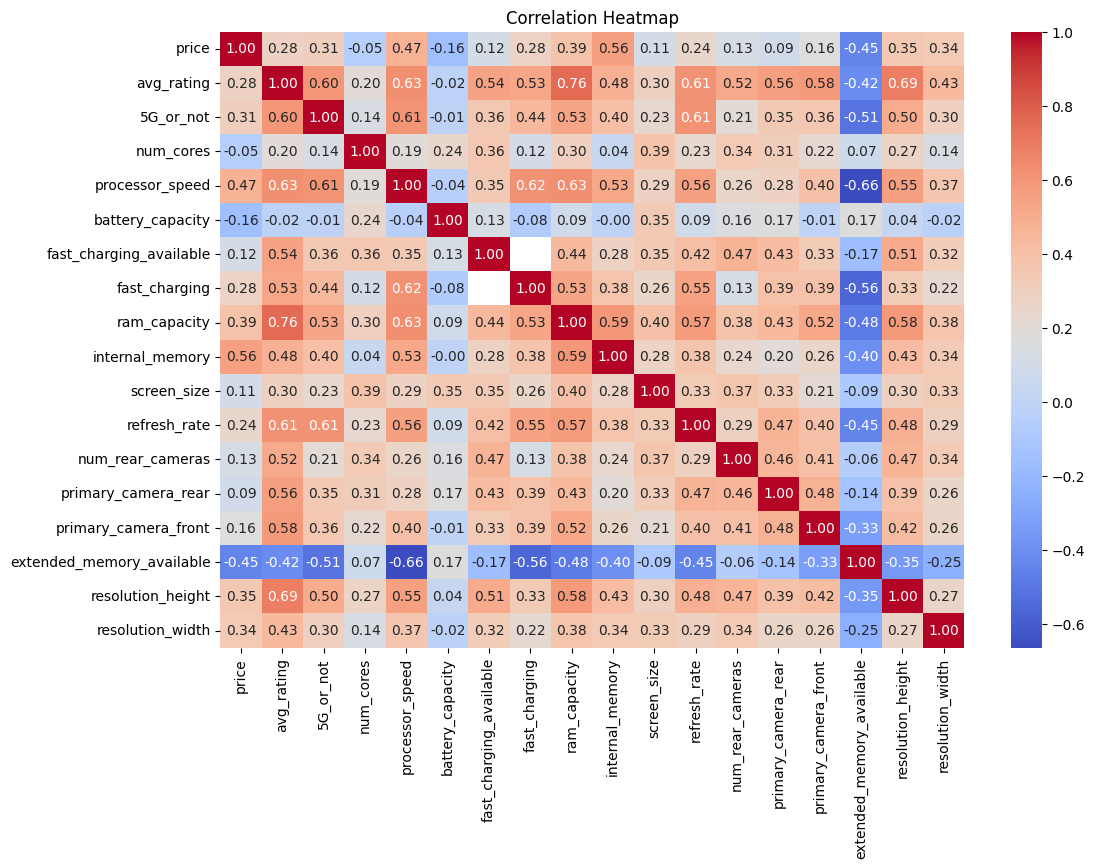

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Identify strongly correlated variables
threshold = 0.7  # Set the correlation threshold
strong_correlations = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix < 1.0)]
strong_correlations = strong_correlations.unstack().dropna().reset_index()
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_correlations['Correlation'] = strong_correlations['Correlation'].round(2)


In [13]:
strong_correlations = strong_correlations[strong_correlations['Correlation'] != 1.0]  
strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False)
print("Strongly correlated variables:")
print(strong_correlations)

Strongly correlated variables:
     Variable 1    Variable 2  Correlation
0    avg_rating  ram_capacity         0.76
1  ram_capacity    avg_rating         0.76


C:\Users\admin\AppData\Local\Temp\ipykernel_8304\3901784766.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\admin\AppData\Local\Temp\ipykernel_8304\3901784766.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\admin\AppData\Local\Temp\ipykernel_8304\3901784766.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\admin\AppData\Local\Temp\ipykernel_8304\3901784766.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\admin\AppData\Local\Temp\ipykernel_8304\3901784766.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\admin\AppData\Local\Temp\ipykernel_8304\3901784766.py:19: Runtime

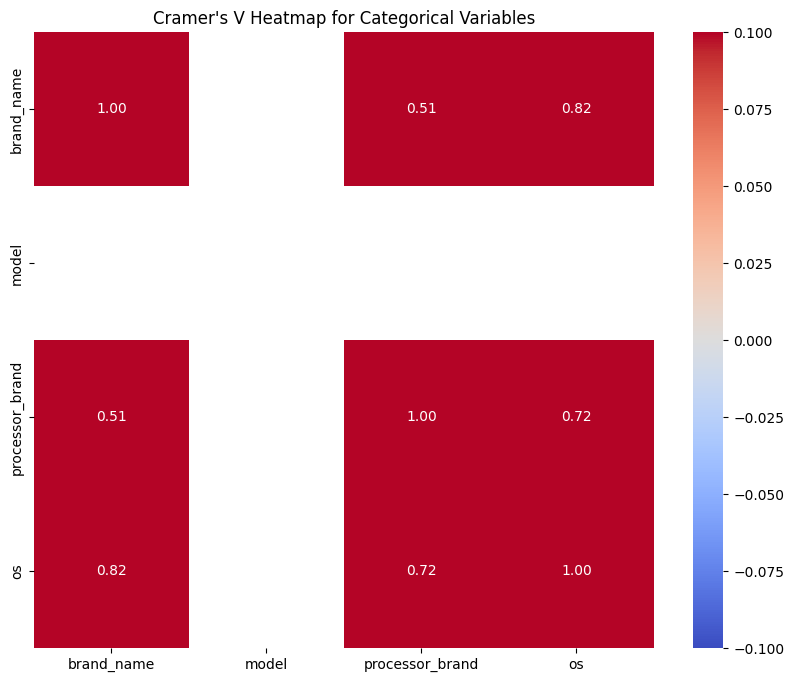

In [15]:
# Cramers' V Method
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Calculating Cramer's V for each pair of categorical columns
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for each pair of categorical columns
cramer_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        confusion_matrix = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        cramers_val = cramers_v(confusion_matrix)
        cramer_v_matrix.iloc[i, j] = cramers_val

# Plotting Cramer's V matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramer's V Heatmap for Categorical Variables")
plt.show()
